In [492]:
#加载库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import  LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [493]:
#加载数据集
train=pd.read_csv("原始data/train.csv")
test=pd.read_csv("原始data/test.csv")
combine=[train,test]

In [494]:
#加载列的特征
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [495]:
#预览数据
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [496]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [497]:
#缺失值数目train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

缺失值数目：
训练集：Cabin>Age>Embarked


In [498]:
#缺失值数目test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

测试集：Cabin>Age>Fare

In [499]:
#train和test的类型
train.info()
print("-"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

类型：训练集：float64(2), int64(5), object(5)
      测试集：float64(2), int64(4), object(5)

In [500]:
#数值分布特征
round(train.describe(percentiles=[.3,.5,.6,.75,.8,.9,.99]),2) 
'''
precentiles 描述了各个分段的数值，round（2）则是表示保留两位小数
'''

'\nprecentiles 描述了各个分段的数值，round（2）则是表示保留两位小数\n'

1.抽取人数为891，约占总游客（2224人）的40％

2.存活的存储方式为0，1，而且只有38%的人活了下来（mean）

3.大多数人买的是3等座（>50%）

4.绝大多数人都在50岁以内（约等于90%）

5.大约30%和兄弟姐妹/配偶一起上船

6.大于20%和父母/孩子一起上船

7.票价差异很大	

测试集就不需要测了，因为我们是预测其特征的，只需要做好清洗就可以了

In [501]:
train.describe(include=['object'])
#这里的视频讲述有误，include通过输入类型，就可以观察到了object类型的情况，top代表最多的，fep是其数量

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


1.name全部唯一

2.sex男性最多，占比（577/891）

3.ticket重复度较高的，大约占（20%）即（891-681）/891

4.Cabin重复度较高，大约（>20%）即（204-147）/204

5.上岸口有三个，其中S口最多（644）


对数据的相关性分析：

1.PassengerId 

2.Survived	

3.Pclass	绝对有关（线性）

4.Age	肯定是相关的，有缺失

5.SibSp	 可能相关，但是缺失值太多，很可能被丢掉

6.Parch	 可能相关

7.Fare  肯定相关 

8.name 可能相关 ，但是它的形式并不规范，我们要考虑有效的部分

9.sex绝对有关，男性显著大于女性


In [502]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by="Survived",ascending=False)
#as_index=False 表示在结果中不将 Pclass 作为索引，而是将其作为普通列

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [503]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [504]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [505]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


sex,Pclass相关

Parch和Sibsp有些并不相关，可以通过产生派生列的方式增强其相关性

In [506]:
#分析完线性关系后，我们要开始可视化分析它们之间的关系了

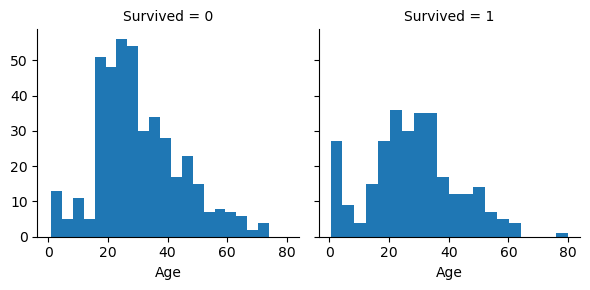

In [507]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=20)

1.年龄低于5岁的存活率很高

2.年龄在20岁左右存活率最低

3.大多数人位于20岁左右

因此，我们需要：

1.考虑年龄组

2.要完成年龄缺失值的填充

3.捆绑年龄组


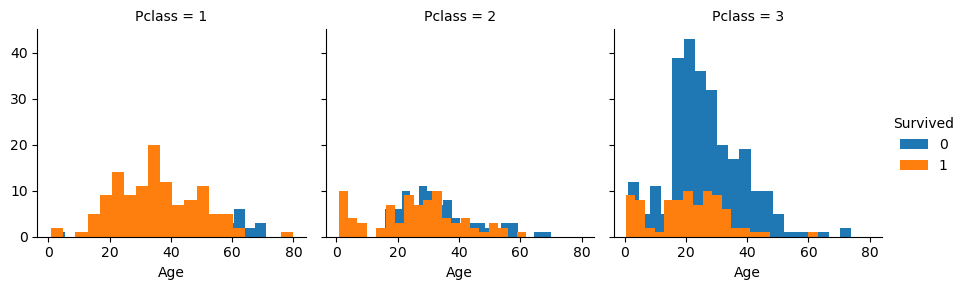

In [508]:
g=sns.FacetGrid(train,col='Pclass',hue='Survived')
g.map(plt.hist,'Age',bins=20)
g.add_legend()#添加了图标名称

Pclass=3大多数人都没有幸存

Pcalss=1和Pclass=2大多数人存活

整体age>60存活率较低

我们知道：Pclass是与存活相关的




c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


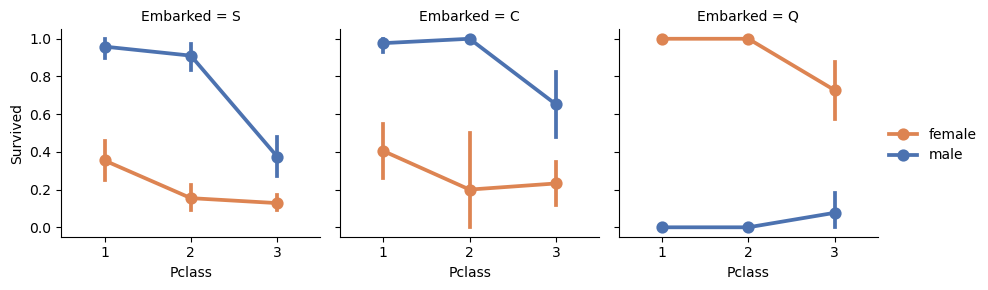

In [509]:
g=sns.FacetGrid(train,col='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
g.add_legend()#添加了图标名称

1.S,C登船的男性更可能幸存

2.Q登船的女性更可能幸存

可以知道：

embarked与survived相关 或者embarked与sex相关，而sex与survived相关，进而embarked与survived间接相关

因此应该添加sex和embarked特征

c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\lenovo

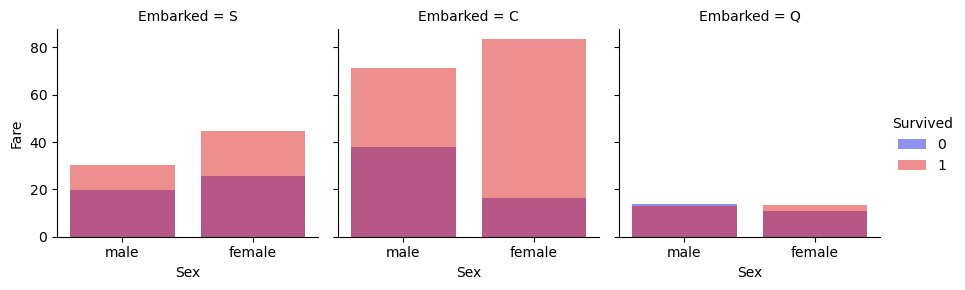

In [510]:
g=sns.FacetGrid(train,col='Embarked',hue='Survived',palette={0:'b',1:'r'})
g.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
g.add_legend()#添加了图标名称

分析fare的方法：由于fare是连续型特征，Embarcked是字符特征，survived是二分特征，可以考虑三者一起绘图
支付费用越高，越容易存活，具有显著的区间性

In [511]:
#删除无用特征ticket和cabin
print("brfore",train.shape,test.shape)
train=train.drop(['Ticket','Cabin'],axis=1)
test=test.drop(['Ticket','Cabin'],axis=1)
combine=[train,test]
print("after",train.shape,test.shape)

brfore (891, 12) (418, 11)
after (891, 10) (418, 9)


考虑到ticket无用，cabin则是缺失值太多了，因此把它们都删除了

In [512]:
train["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

我们观察到每个名字之前都有头衔，后面的名字大概率是无关的，那头衔是否可能有关呢？我们把它们提取出来考虑

In [513]:
for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex']).sort_values(by='female',ascending=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_26788\4059586476.py:2: SyntaxWarning: invalid escape sequence '\.'
  data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)


Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


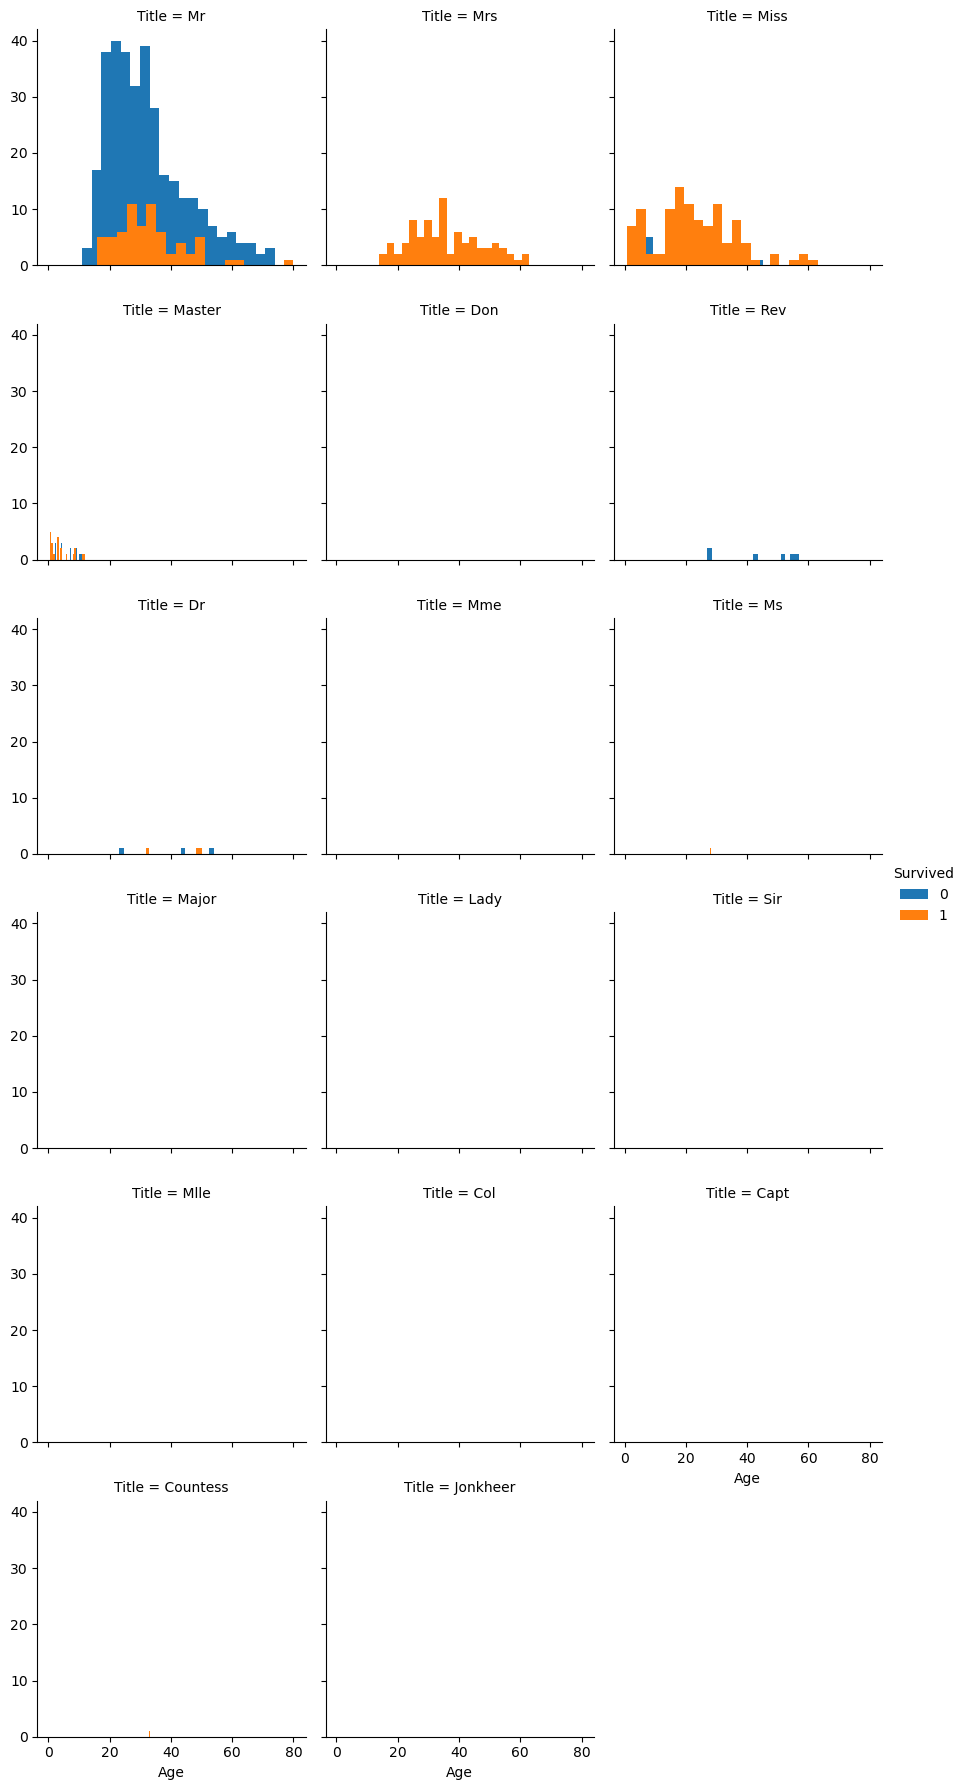

In [514]:
g=sns.FacetGrid(train,col='Title',hue='Survived',col_wrap=3)
g.map(plt.hist,'Age',bins=20)
g.add_legend()#添加了图标名称

Mlle Mme Countess Dr  Lady Capt Rev	这些很少很少，我们可以把它们归为一类rare，进而增强相关性和统计规律

In [515]:
for data in combine:
    data['Title']=data['Title'].replace(['Jonkheer','Countess','Capt','Col','Mile','Sir','Lady','Major','Ms','Mme','Dr','Rev','Don','Master'],'Rare')
train[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Miss,0.697802
Mlle,1.000000
Mr,0.156673
Mrs,0.792000
Rare,0.507692


In [516]:
mapping={'Mr':1,'Miss':2,'Mrs':3,'Mile':4,'Rare':5}
for data in combine:
    data['Title']=data['Title'].map(mapping)
    data['Title']=data['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [517]:
train = train.drop(['PassengerId', 'Name'], axis=1)
test = test.drop('Name', axis=1)
combine=[train,test]
train.shape,test.shape

((891, 9), (418, 9))

In [518]:
#开始数值化
for data in combine:
    data['Sex']=data['Sex'].map({'female':1,'male':0}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


填补age缺失值：通过Pclass和Sex的这两个相关的变量加以预测

In [519]:
#Sex（0，1）与Pclass（1，2，3）来预测age缺失值
# 初始化用于存储预测年龄的数组
age_guess_array = np.zeros((2, 3))

for data in combine:
    # 计算每个 Sex 和 Pclass 组合的年龄中位数
    for i in range(2):
        for j in range(3):
            # 获取符合条件的年龄数据
            age_data = data[(data['Sex'] == i) & (data['Pclass'] == j + 1)]['Age'].dropna()
            
            # 计算年龄的中位数
            if not age_data.empty:  # 确保数据不为空
                age_guess = age_data.median()
                # 四舍五入到最接近的 0.5
                age_guess_array[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    # 用计算出的猜测年龄填补缺失的 Age 值
    for i in range(2):
        for j in range(3):
            # 填补缺失值
            data.loc[(data['Age'].isnull()) & (data['Sex'] == i) & (data['Pclass'] == j + 1), 'Age'] = age_guess_array[i, j]

    # 将 Age 列转换为整数
    data['Age'] = data['Age'].astype(int)

# 显示训练数据的前几行
train.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

我们还要对年龄进行分组

In [520]:
train['AgeBound']=pd.cut(train['Age'],5)
train[['AgeBound','Survived']].groupby('AgeBound',as_index=False).mean().sort_values(by='AgeBound',ascending=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_26788\3066771651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['AgeBound','Survived']].groupby('AgeBound',as_index=False).mean().sort_values(by='AgeBound',ascending=True)


,AgeBound,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [521]:
for data in combine:
    data.loc[data['Age']<=16,'Age']=0
    data.loc[(data['Age']<=32)&(data['Age']>16),'Age']=1
    data.loc[(data['Age']<=48)&(data['Age']>32),'Age']=2
    data.loc[(data['Age']<=64)&(data['Age']>48),'Age']=3
    data.loc[(data['Age']<=80)&(data['Age']>64),'Age']=4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBound
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [522]:
#联系起来Sibsp和Parch，表示FamilySize的总数量
for data in combine:
    data['FamilySize']=data['Parch']+data['SibSp']+1
train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [523]:
#引进IsAlone，判断是否为孤身一人
for data in combine:
    data['IsAlone']=0
    data.loc[data['FamilySize']==1,'IsAlone']=1
train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


观察到familysize存在不相关的点，把它们舍弃掉

In [524]:
train=train.drop(['SibSp','Parch','FamilySize'],axis=1)
test=test.drop(['SibSp','Parch','FamilySize'],axis=1)
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBound,IsAlone
0,0,3,0,1,7.2500,S,1.0,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3.0,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2.0,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3.0,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1.0,"(32.0, 48.0]",1


In [525]:
for data in combine:
    data['Pclass'] = data['Pclass'].astype(int)
    data['Age'] = data['Age'].astype(int)
    data['Age*Pclass']=data.Age*data.Pclass
train.head()
train[['Age*Pclass', 'Survived']].groupby(['Age*Pclass'], as_index=False).mean()
train=train.drop(['Age*Pclass'],axis=1)
test=test.drop(['Age*Pclass'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBound,IsAlone
0,0,3,0,1,7.2500,S,1.0,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3.0,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2.0,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3.0,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1.0,"(32.0, 48.0]",1


In [535]:
# 众数填充
for data in combine:
    data['Embarked'] = data['Embarked'].fillna('S')

# 检查填充后的缺失值
print(train['Embarked'].isnull().sum())


0


In [536]:
for data in combine:
    data['Embarked']=data['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1.0,0
1,1,1,1,2,71.2833,2,3.0,0
2,1,3,1,1,7.9250,0,2.0,1
3,1,1,1,2,53.1000,0,3.0,0
4,0,3,0,2,8.0500,0,1.0,1


In [528]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)
test.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26788\2756565457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1.0,1
1,893,3,1,2,7.0000,S,3.0,0
2,894,2,0,3,9.6875,Q,1.0,1
3,895,3,0,1,8.6625,S,1.0,1
4,896,3,1,1,12.2875,S,3.0,0


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

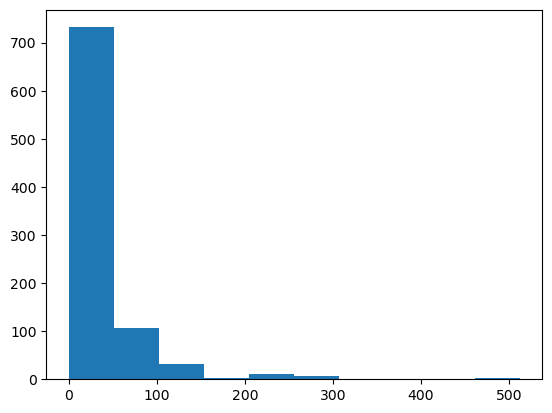

In [529]:
plt.hist(train['Fare'])

可以看到，0-100处于最多的位置，可见票价大多稳定在较低价的水平

In [537]:
train['FareBound']=pd.qcut(train['Fare'],4)#等频分箱
train[['FareBound','Survived']].groupby(['FareBound'],as_index=False).mean().sort_values(by='FareBound',ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26788\1236540301.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['FareBound','Survived']].groupby(['FareBound'],as_index=False).mean().sort_values(by='FareBound',ascending=False)


,FareBound,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [542]:
for data in combine:
    data.loc[data['Fare']<=7.91,'Fare']=0
    data.loc[(data['Fare']<=14.454)&(data['Fare']>7.91),'Fare']=1
    data.loc[(data['Fare']<=31)&(data['Fare']>14.454),'Fare']=2
    data.loc[(data['Fare']<=512.329)&(data['Fare']>31),'Fare']=3
train=train.drop(['FareBound','AgeBound'],axis=1)        
combine=[train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0.0,0,1.0,0
1,1,1,1,2,0.0,2,3.0,0
2,1,3,1,1,0.0,0,2.0,1
3,1,1,1,2,0.0,0,3.0,0
4,0,3,0,2,0.0,0,1.0,1


这是一个典型的分类和回归问题

In [543]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test.drop('PassengerId',axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,1,0.0,0,1.0,0
1,1,1,2,0.0,2,3.0,0
2,3,1,1,0.0,0,2.0,1
3,1,1,2,0.0,0,3.0,0
4,3,0,2,0.0,0,1.0,1


In [544]:
#逻辑回归：
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log#正确率为81.48%

81.48

In [545]:
coff=pd.DataFrame(train.columns.delete(0))
coff.columns=['Feature']
coff['Coffelation']=pd.Series(logreg.coef_[0])
coff.sort_values(by='Coffelation',ascending=False)

,Feature,Coffelation
1,Sex,2.300246
5,Title,0.405609
6,IsAlone,0.369571
4,Embarked,0.270137
3,Fare,0.029519
2,Age,-0.521037
0,Pclass,-1.156862


1.Sex是一个不错的特征

2.Title是第二个正相关的特征

3.Pclass是最好的负相关特征

4.Age*Pclass绝对值过小，可能不是好的特征



In [546]:
#支持向量机
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

74.41

In [547]:
#sgd
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

70.82

In [548]:
#KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.16

In [549]:
#朴素贝叶斯分类器
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

61.95

In [550]:
#感知机
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

78.0

In [551]:
#决策树
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

84.29

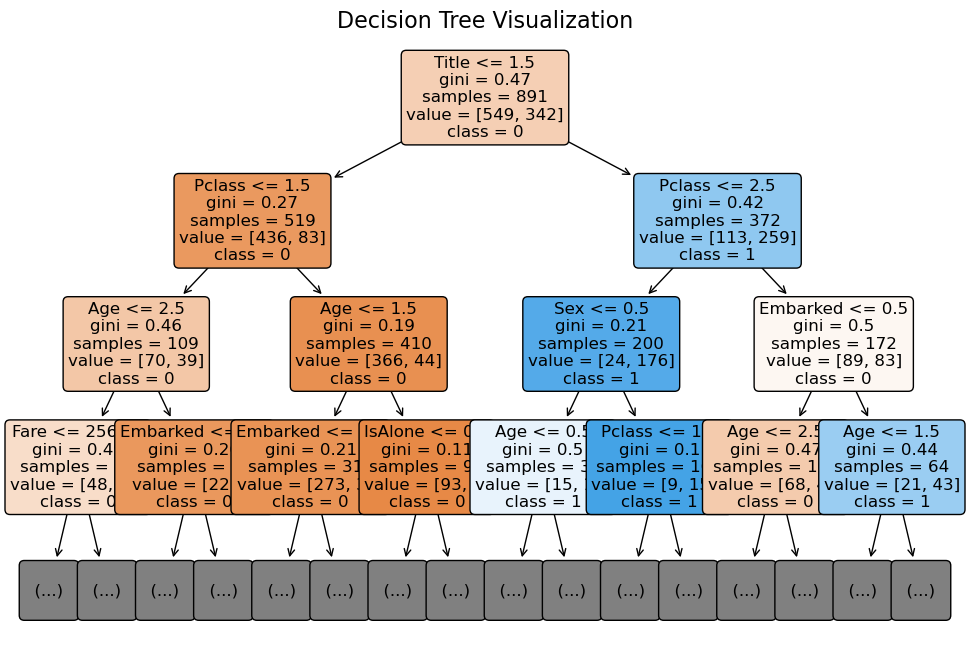

In [431]:
#左边true，右边false
import matplotlib.pyplot as plt
from sklearn import tree
# 可视化决策树
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns,
               class_names=['0', '1'],
               filled=True,
               rounded=True,
               fontsize=12,
               precision=2,max_depth=3)  # 增加字体大小和精度

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()



In [552]:
#随机森林
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

84.18

In [553]:
#模型评估
models=pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Native Bayes','Perceptron','Stochastic Gradient Decent',
             'Linear SVC','Decision Tree'] ,
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,acc_log,acc_decision_tree]}
)
models.sort_values(by='Score',ascending=False)

,Model,Score
8,Decision Tree,84.29
3,Random Forest,84.18
1,KNN,83.16
2,Logistic Regression,81.48
7,Linear SVC,81.48
5,Perceptron,78.00
0,Support Vector Machines,74.41
6,Stochastic Gradient Decent,70.82
4,Native Bayes,61.95


In [554]:
submisson=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':Y_pred
})
submisson.to_csv('submisson.csv',index=False)

In [555]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0.0,0,1.0,0
1,1,1,1,2,0.0,2,3.0,0
2,1,3,1,1,0.0,0,2.0,1
3,1,1,1,2,0.0,0,3.0,0
4,0,3,0,2,0.0,0,1.0,1
